<a href="https://colab.research.google.com/github/dlt434/1111/blob/main/Test_code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip
!pip install cplot
!pip install matplotlib

<ipython-input-6-f6949564d46a>:32: RuntimeWarning: divide by zero encountered in scalar divide
  W_integral = (2 / T) * integrate.simps(integrate.simps(wigner_integrand(gamma_value, gamma, k_taw, W0, T), x), y)
<ipython-input-6-f6949564d46a>:30: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / np.pi) * np.exp((-2 / T) * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0
<ipython-input-6-f6949564d46a>:30: RuntimeWarning: invalid value encountered in multiply
  return (1 / np.pi) * np.exp((-2 / T) * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0
<ipython-input-6-f6949564d46a>:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  W_integral = (2 / T) * integrate.simps(integrate.simps(wigner_integrand(gamma_value, gamma, k_taw, W0, T), x), y)
<ipython-input-6-f6949564d46a>:35: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be rem

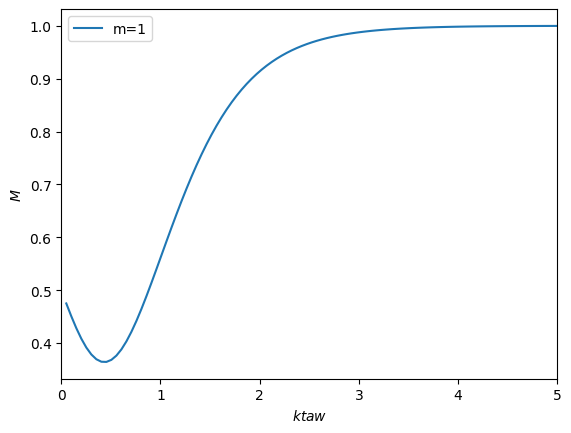

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

N = 10
k_taw_values = np.linspace(0, 5, 100)
M_values = []
m = 1

psi = fock(N, m)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
gamma = X + 1j * Y
W0 = qutip.wigner(psi, x, y)

delta_values = []

for k_taw in k_taw_values:
    T = 1 - np.exp(-2 * k_taw)

    W = np.zeros_like(W0, dtype=complex)

    for i in range(len(x)):
        for j in range(len(y)):
            gamma_value = gamma[i, j]

            def w_integrand(ksi, gamma, k_taw, W0, T):
                return (1 / np.pi) * np.exp((-2 / T)
                * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0

            W_integral = (
                (2 / T) * integrate.simps(integrate.simps(w_integrand(
                    gamma_value, gamma, k_taw, W0, T), x), y)
            )
            W[i, j] = W_integral

    M_integral = integrate.simps(integrate.simps(np.abs(W)**2, y), x)
    M = np.pi * M_integral
    M_values.append(M)

plt.plot(k_taw_values, M_values, label='m=1')
plt.xlim(0, 5)
plt.show()